Подключение библиотек 

In [1]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.preprocessing import StandardScaler

Данные

In [2]:
data= pd.read_csv('C:/Users/User/Desktop/train.csv')

In [3]:
for fname in data['fname']:
  y, sr= librosa.load('C:/Users/User/Desktop/audio_train/train/' + fname)

Расчет MFFC и вывод спектрограммы

In [4]:
librosa.feature.mfcc(y=y, sr=sr)

array([[-5.1648273e+02, -5.2839972e+02, -5.4115448e+02, ...,
        -4.8008691e+02, -4.8877283e+02, -5.1351013e+02],
       [ 6.9732529e+01,  6.2425560e+01,  5.1751930e+01, ...,
         4.0813477e+01,  5.0526882e+01,  4.7674011e+01],
       [-6.5431414e+00, -5.1838102e+00, -1.7540562e+00, ...,
        -1.1172452e+00, -4.3635052e-01,  2.6071596e+00],
       ...,
       [-6.4582109e+00, -4.0532541e+00, -3.2118473e+00, ...,
         3.8078482e+00,  2.0061495e+00,  1.4161110e+00],
       [-1.4549789e+00, -7.4319708e-01, -2.4363654e+00, ...,
         3.8049049e+00,  1.1620498e+00,  1.2663881e+00],
       [ 5.3636751e+00,  6.2308717e+00,  4.9731913e+00, ...,
         4.5774860e+00,  4.8237520e-01,  4.7426057e-01]], dtype=float32)

In [5]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)

In [6]:
librosa.feature.mfcc(S=librosa.power_to_db(S))

array([[-5.0371613e+02, -5.1681000e+02, -5.3088470e+02, ...,
        -4.6365872e+02, -4.7312411e+02, -5.0058765e+02],
       [ 5.9388062e+01,  5.2849655e+01,  4.2603146e+01, ...,
         1.9980465e+01,  3.2988861e+01,  3.4170898e+01],
       [-2.0183589e+00, -4.2497194e-01,  4.5319705e+00, ...,
         2.2321068e+01,  1.7643190e+01,  1.6610405e+01],
       ...,
       [ 5.5373778e+00,  6.7110548e+00,  4.4717875e+00, ...,
         6.9686513e+00,  2.1058953e+00,  1.1054088e+00],
       [-3.7218332e+00, -8.4406364e-01, -3.3477238e-01, ...,
        -2.4507885e+00, -2.9798138e+00, -6.4488292e-01],
       [-4.5108026e-01, -1.7825354e+00, -5.6002245e+00, ...,
         1.8769128e+00,  2.2965927e+00,  5.6648335e+00]], dtype=float32)

In [7]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

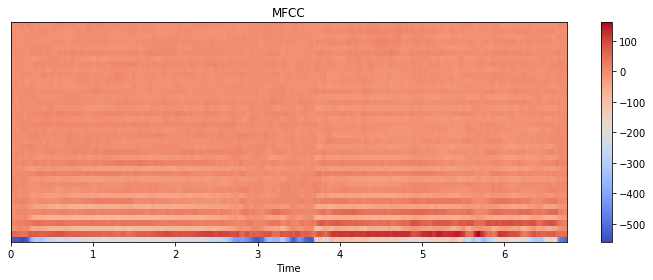

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [9]:
data_librosa = []
for fname in data['fname']:
  y, sr= librosa.load('C:/Users/User/Desktop/audio_train/train/' + fname)
  data_mfcc= librosa.feature.mfcc(y=y, sr=sr)
  data_librosa.append(data_mfcc)

In [10]:
label=[]
for l in data['label']:
    label = list(data['label'])

Сохраняем полученные результаты в pickle

In [11]:
with open('C:/Users/User/Desktop/data_mfcc.pickle', 'wb') as f_d:
    pickle.dump(data_mfcc, f_d)

In [12]:
with open('C:/Users/User/Desktop/data_mfcc.pickle', 'rb') as f:
    data_pickle = pickle.load(f)

In [13]:
with open('C:/Users/User/Desktop/all_data_mfcc.pickle', 'wb') as f_d:
    pickle.dump(data_librosa, f_d)

In [14]:
with open('C:/Users/User/Desktop/all_data_mfcc.pickle', 'rb') as f:
  all_data_pickle = pickle.load(f)

Выравниваем данные

In [15]:
average=[]
for e in all_data_pickle:
  average.append(np.mean(e, axis=1))

In [16]:
with open('C:/Users/User/Desktop/average_data.pickle', 'wb') as f_d:
    pickle.dump(average, f_d)

In [17]:
with open('C:/Users/User/Desktop/average_data.pickle', 'rb') as f:
  average_data = pickle.load(f)

Разбиваем на train и test

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(average_data, label, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=0)

Предсказание train и его результат 

In [20]:
result = clf.predict(X_train)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, result))

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

      Acoustic_guitar       0.66      0.80      0.72       158
             Applause       0.59      0.91      0.72       154
                 Bark       0.52      0.70      0.60       126
            Bass_drum       0.55      0.76      0.64       153
Burping_or_eructation       0.91      0.69      0.78        89
                  Bus       0.79      0.37      0.50        52
                Cello       0.61      0.75      0.67       146
                Chime       1.00      0.37      0.53        63
             Clarinet       0.82      0.94      0.88       143
    Computer_keyboard       0.00      0.00      0.00        50
                Cough       0.72      0.35      0.47       133
              Cowbell       0.76      0.75      0.76        97
          Double_bass       0.66      0.86      0.75       146
 Drawer_open_or_close       1.00      0.01      0.02        79
       Electric_piano       0.93      0.74      0.82  

Предсказание test и его результат

In [22]:
result = clf.predict(X_test)

In [23]:
prediction_2 = clf.predict(X_test)

print(classification_report(y_test, prediction_2, digits = 5))

                       precision    recall  f1-score   support

      Acoustic_guitar    0.33333   0.62069   0.43373        29
             Applause    0.37097   0.79310   0.50549        29
                 Bark    0.32609   0.71429   0.44776        21
            Bass_drum    0.52381   0.78571   0.62857        28
Burping_or_eructation    0.63636   0.29167   0.40000        24
                  Bus    0.40000   0.16667   0.23529        12
                Cello    0.42593   0.57500   0.48936        40
                Chime    1.00000   0.06667   0.12500        15
             Clarinet    0.61765   0.63636   0.62687        33
    Computer_keyboard    0.00000   0.00000   0.00000        16
                Cough    0.33333   0.10000   0.15385        30
              Cowbell    0.42857   0.60000   0.50000        20
          Double_bass    0.57812   0.82222   0.67890        45
 Drawer_open_or_close    0.00000   0.00000   0.00000        15
       Electric_piano    0.42857   0.25000   0.31579  

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Матрица путаницы для train

[[0.8  0.01 0.02 ... 0.   0.01 0.01]
 [0.   0.91 0.   ... 0.01 0.   0.  ]
 [0.02 0.03 0.7  ... 0.   0.   0.  ]
 ...
 [0.01 0.05 0.04 ... 0.51 0.01 0.06]
 [0.03 0.03 0.01 ... 0.   0.57 0.04]
 [0.01 0.01 0.01 ... 0.   0.   0.62]]


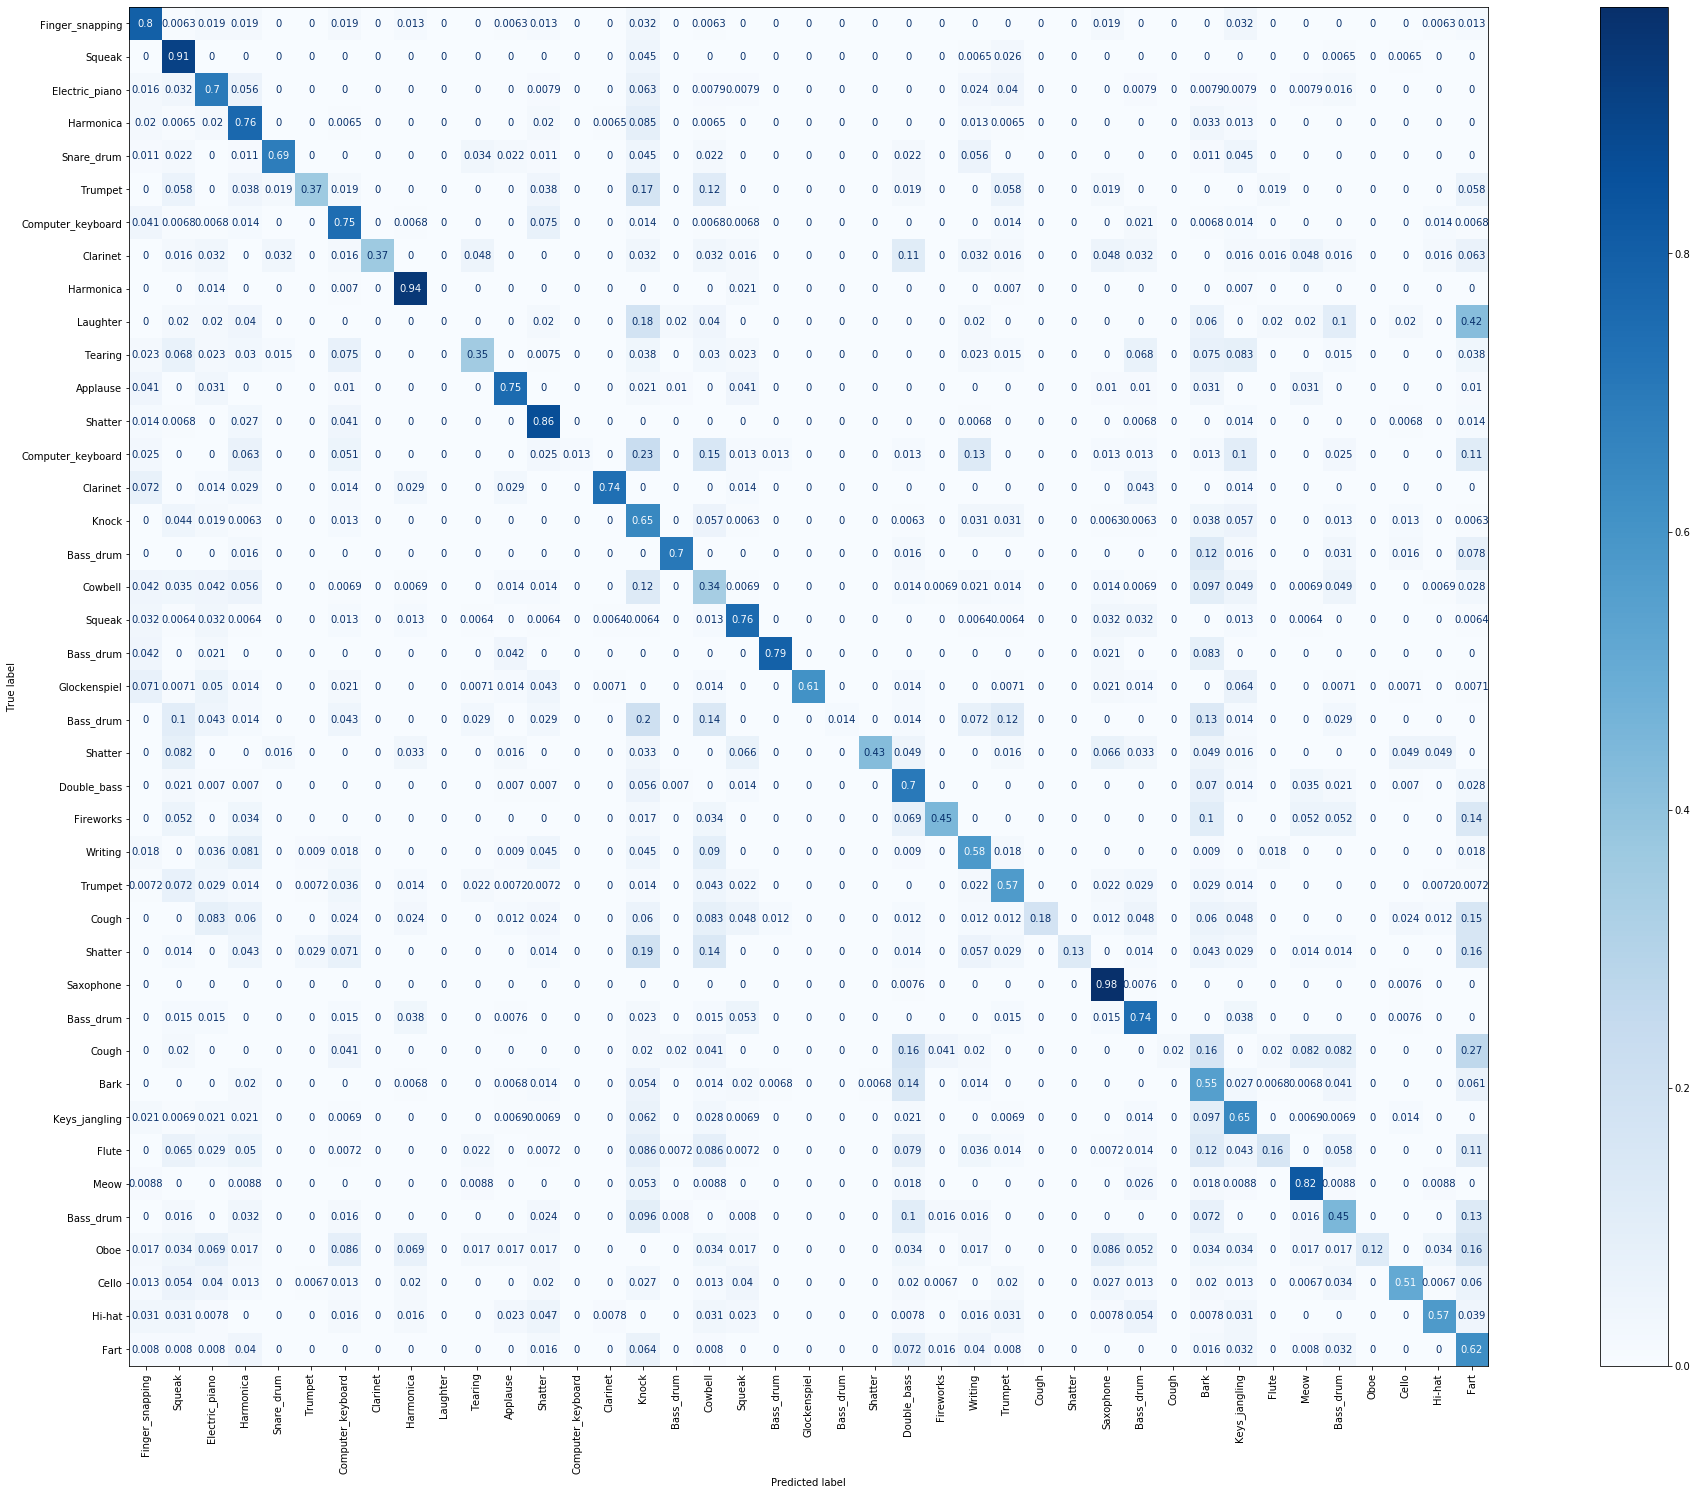

In [24]:
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(clf , X_train, y_train, display_labels=label,
                             cmap=plt.cm.Blues, xticks_rotation='vertical',
                             normalize='true') 

print(disp.confusion_matrix)
fig = plt.gcf()
fig.set_size_inches(40, 25)
plt.show()

Матрица путаницы для test

[[0.62 0.   0.   ... 0.   0.   0.  ]
 [0.   0.79 0.   ... 0.   0.   0.  ]
 [0.   0.   0.71 ... 0.1  0.   0.  ]
 ...
 [0.05 0.   0.05 ... 0.38 0.   0.03]
 [0.11 0.03 0.   ... 0.03 0.37 0.  ]
 [0.   0.08 0.   ... 0.   0.   0.53]]


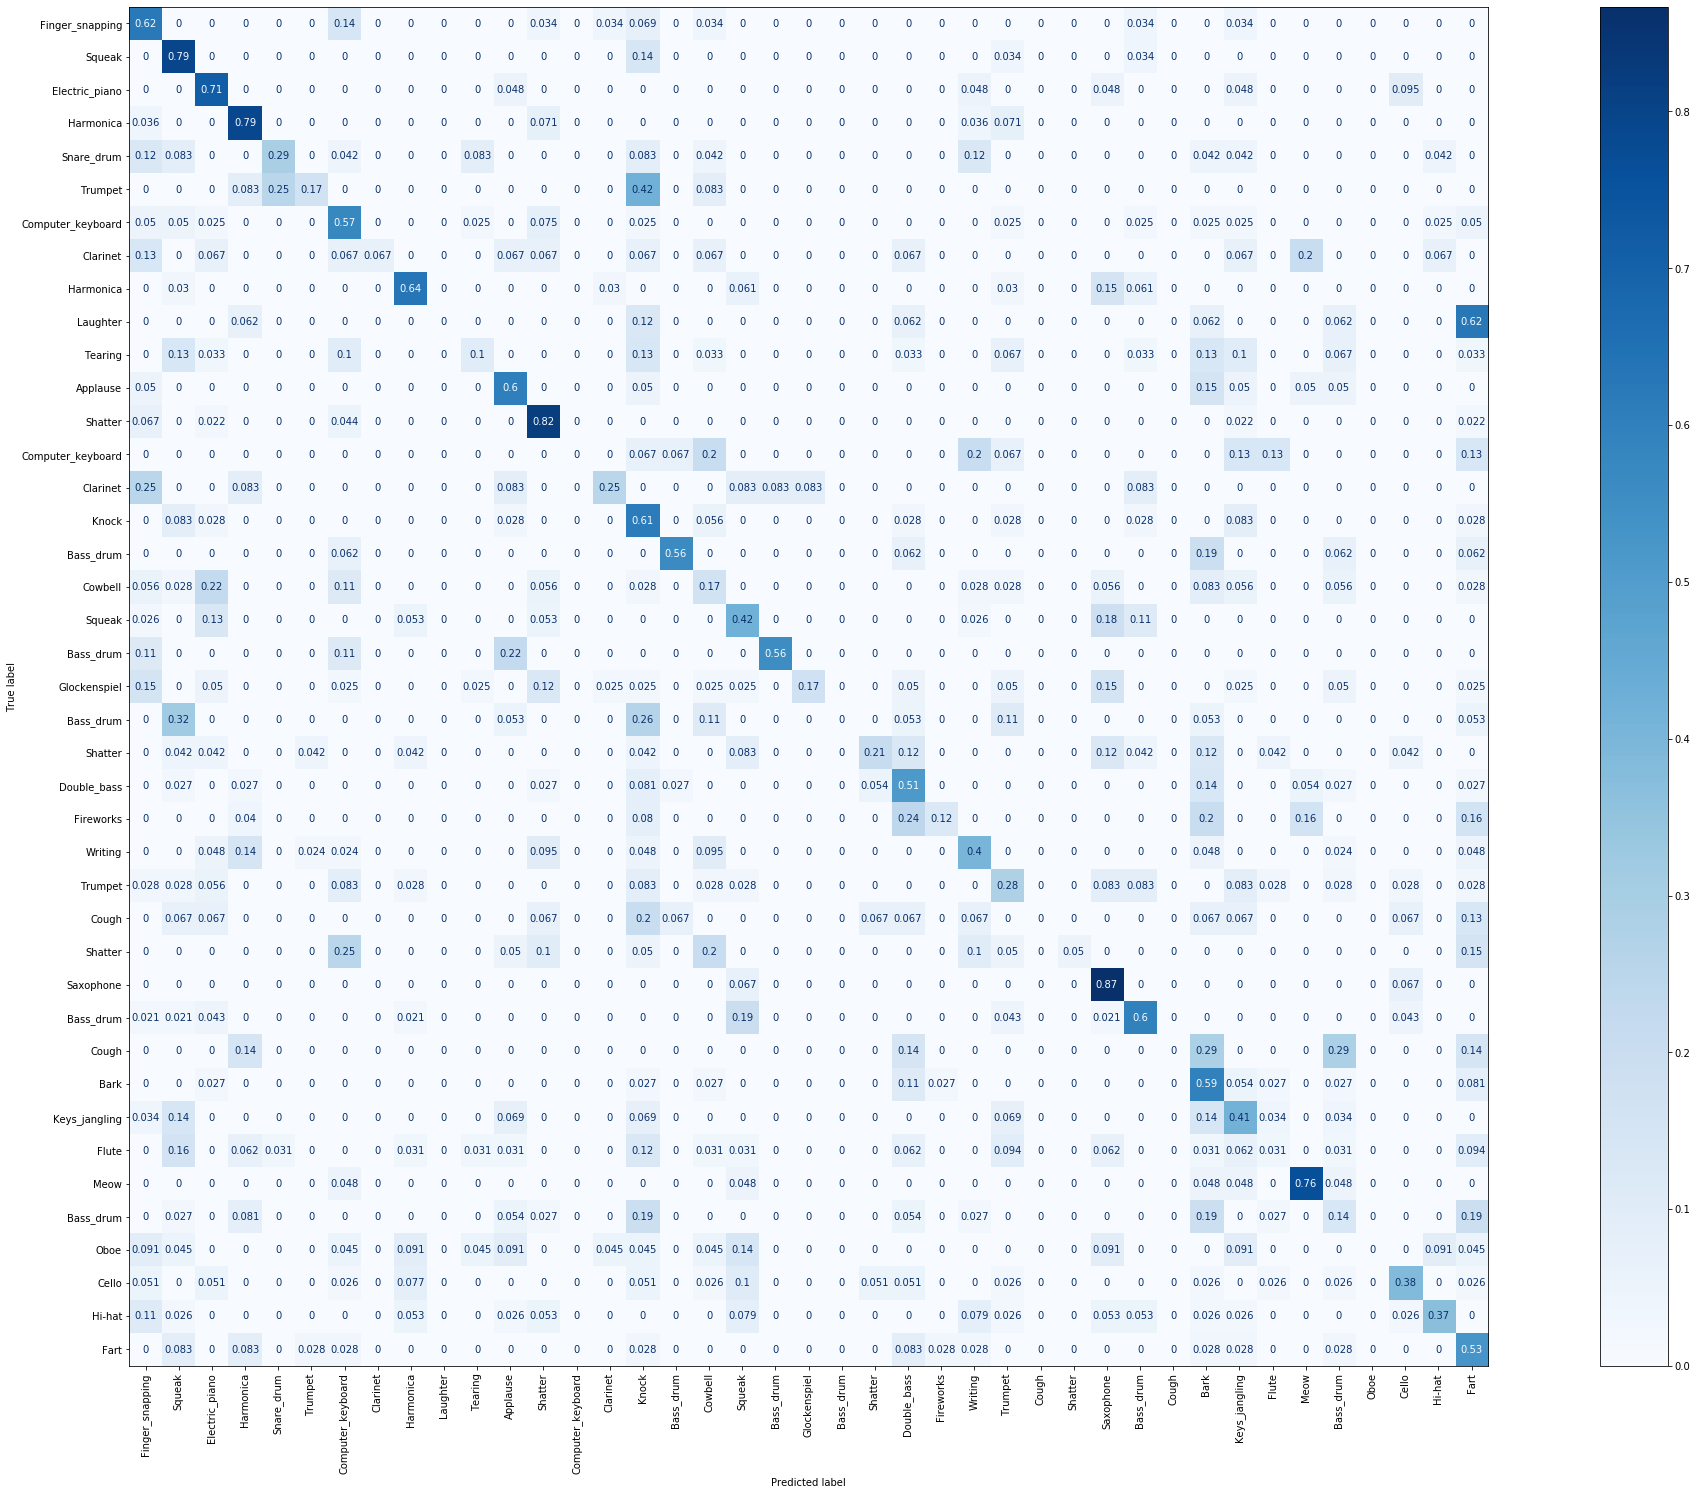

In [25]:
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(clf , X_test, y_test, display_labels=label,
                             cmap=plt.cm.Blues, xticks_rotation='vertical',
                             normalize='true') 

print(disp.confusion_matrix)
fig = plt.gcf()
fig.set_size_inches(40, 25)
plt.show()